In [1]:
import pandas as pd
import mysql.connector
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("SQL-Project-1-Table.csv")

In [3]:
df.head(10)

,ds,job_id,actor_id,event,language,time_spent,org
0,30-11-2020,21,1001,skip,English,15,A
1,30-11-2020,22,1006,transfer,Arabic,25,B
2,29-11-2020,23,1003,decision,Persian,20,C
3,28-11-2020,23,1005,transfer,Persian,22,D
4,28-11-2020,25,1002,decision,Hindi,11,B
5,27-11-2020,11,1007,decision,French,104,D
6,26-11-2020,23,1004,skip,Persian,56,A
7,25-11-2020,20,1003,transfer,Italian,45,C


In [4]:
cnn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Root@123',
    database='trianity_3'
)

cursor = cnn.cursor()

In [5]:
cursor.execute('''CREATE TABLE sqlproject1 (ds DATE,job_id INT, actor_id INT, event varchar(30), language varchar(30),time_spent INT,org varchar(10));''')

In [6]:
for i,row in df.iterrows():
            a = str(row["ds"])
            a = datetime.strptime( a , '%d-%m-%Y')
            a = a.date()
            b = row["job_id"]
            c = row["actor_id"]
            d = str(row["event"])
            e = str(row["language"])
            f = row["time_spent"]
            g = row["org"]
            sql = f"INSERT INTO sqlproject1 (ds, job_id, actor_id, event, language, time_spent, org) VALUES ('{a}',{b},{c},'{d}','{e}',{f},'{g}');"
            cursor.execute(sql)
            


In [8]:
# Question 1 

In [9]:
cursor.execute('''CREATE VIEW jobs_reviewed_per_hour AS
SELECT DATE_FORMAT(ds, '%Y-%m-%d %H:00:00') AS hour, COUNT(*) AS jobs_reviewed
FROM sqlproject1
WHERE ds >= '2020-11-01' AND ds < '2020-12-01'
GROUP BY DATE_FORMAT(ds, '%Y-%m-%d %H:00:00')
ORDER BY hour;
''')



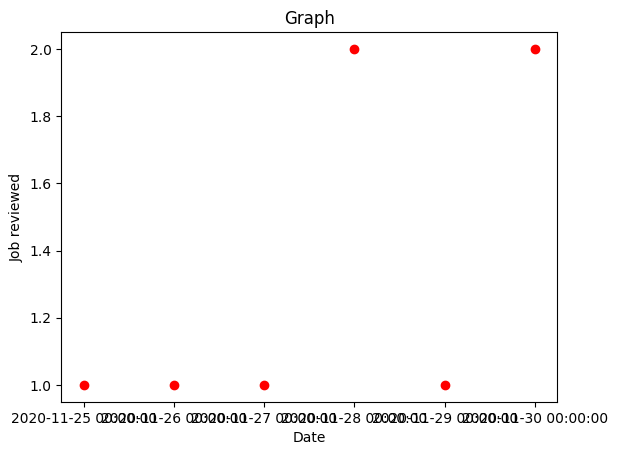

In [10]:
cursor.execute('''SELECT * FROM jobs_reviewed_per_hour''')
Date = []
Job_reviewed = []
for row in cursor:
    Date.append(row[0])
    Job_reviewed.append(row[1])
    
plt.plot(Date, Job_reviewed, marker='o', linestyle=' ', color='r')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Job reviewed')
plt.title('Graph')

# Display the graph
plt.show()


In [11]:
# Question 2

In [12]:
cursor.execute('''CREATE VIEW rolling_avg_throughput AS
SELECT ds, AVG(count_per_second) OVER (ORDER BY ds ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS rolling_avg_throughput
FROM (
    SELECT ds, COUNT(*) AS count_per_second
    FROM sqlproject1
    GROUP BY ds
) subquery;
''')

In [13]:
cursor.execute('''SELECT * FROM rolling_avg_throughput''')

for row in cursor: 
    print(row)

(datetime.date(2020, 11, 25), Decimal('1.0000'))
(datetime.date(2020, 11, 26), Decimal('1.0000'))
(datetime.date(2020, 11, 27), Decimal('1.0000'))
(datetime.date(2020, 11, 28), Decimal('1.2500'))
(datetime.date(2020, 11, 29), Decimal('1.2000'))
(datetime.date(2020, 11, 30), Decimal('1.3333'))


In [14]:
#Question 3

In [20]:
cursor.execute('''
SELECT event, language, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM sqlproject1 WHERE event IS NOT NULL) AS percentage_share
FROM sqlproject1
WHERE event IS NOT NULL
GROUP BY event, language;
''')

for row in cursor: 
    print(row)

('skip', 'English', Decimal('12.50000'))
('transfer', 'Arabic', Decimal('12.50000'))
('decision', 'Persian', Decimal('12.50000'))
('transfer', 'Persian', Decimal('12.50000'))
('decision', 'Hindi', Decimal('12.50000'))
('decision', 'French', Decimal('12.50000'))
('skip', 'Persian', Decimal('12.50000'))
('transfer', 'Italian', Decimal('12.50000'))


In [21]:
# Question 4

In [22]:
cursor.execute('''
CREATE VIEW duplicate_rows AS
SELECT *
FROM sqlproject1
WHERE (job_id, actor_id, event, language, time_spent, org, ds) IN (
    SELECT job_id, actor_id, event, language, time_spent, org, ds
    FROM sqlproject1
    GROUP BY job_id, actor_id, event, language, time_spent, org, ds
    HAVING COUNT(*) > 1
);
''')



In [23]:
cursor.execute('''SELECT * FROM duplicate_rows''')

for row in cursor: 
    print(row)  

In [24]:
cnn.commit()

In [26]:
cnn.close()
cnn.close()